<a href="https://colab.research.google.com/github/Nov05/Lambda-School-Data-Science/blob/master/LSDS_Intro_Assignment_6_Linear_Algebra_Applications.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Algebra Applications Assignment





### Your data:

**chirps_per_sec** = chirps/sec for the striped ground cricket

**temperature** = temperature in degrees Fahrenheit

Reference: The Song of Insects by Dr.G.W. Pierce, Harvard College Press

In [0]:
import matplotlib.pyplot as plt
import numpy as np

In [0]:
!pip install xlrd
import pandas as pd

df = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/slr/excel/slr02.xls')
df = df.rename(columns={'X':'chirps_per_sec', 'Y':'temperature'})

print(df.shape)
df.head()

*** No CODEPAGE record, no encoding_override: will use 'ascii'
(15, 2)


,chirps_per_sec,temperature
0,20.000000,88.599998
1,16.000000,71.599998
2,19.799999,93.300003
3,18.400000,84.300003
4,17.100000,80.599998


## 1) Graph a scatterplot of chirps_per_sec vs temperature 

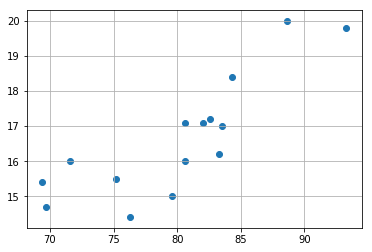

In [0]:
##### Your Code Here #####
plt.scatter(df.temperature, df.chirps_per_sec)
plt.grid(True)

## 2) Follow the steps below to compute the coefficients (intercept and slope) for the line of best fit:

## 2.1) Use np.ones to add a column of ones to the dataframe

In [0]:
##### Your Code Here #####
df['ones'] = np.ones(df.shape[0])

In [0]:
df.head()

,chirps_per_sec,temperature,ones
0,20.000000,88.599998,1.0
1,16.000000,71.599998,1.0
2,19.799999,93.300003,1.0
3,18.400000,84.300003,1.0
4,17.100000,80.599998,1.0


## 2.2) Create your X matrix from the 'ones' and 'temperature' columns

In [0]:
df[['temperature', 'ones']].head()

,temperature,ones
0,88.599998,1.0
1,71.599998,1.0
2,93.300003,1.0
3,84.300003,1.0
4,80.599998,1.0


In [0]:
##### Your Code Here #####
X = np.matrix(df[['ones', 'temperature']])
print(X)

[[ 1.         88.59999847]
 [ 1.         71.59999847]
 [ 1.         93.30000305]
 [ 1.         84.30000305]
 [ 1.         80.59999847]
 [ 1.         75.19999695]
 [ 1.         69.69999695]
 [ 1.         82.        ]
 [ 1.         69.40000153]
 [ 1.         83.30000305]
 [ 1.         79.59999847]
 [ 1.         82.59999847]
 [ 1.         80.59999847]
 [ 1.         83.5       ]
 [ 1.         76.30000305]]


## 2.3) Create your Y vector from the chirps_per_sec column. (Make sure that it is formatted as a column vector.)

In [0]:
##### Your Code Here #####
Y = np.transpose(np.matrix(df.chirps_per_sec.values))
print(Y)

[[20.        ]
 [16.        ]
 [19.79999924]
 [18.39999962]
 [17.10000038]
 [15.5       ]
 [14.69999981]
 [17.10000038]
 [15.39999962]
 [16.20000076]
 [15.        ]
 [17.20000076]
 [16.        ]
 [17.        ]
 [14.39999962]]


## 2.4) Calculate X_transpose and print the result: $X^{T}$ 

In [0]:
##### Your Code Here #####
X_transpose = np.transpose(X)
print(X_transpose)

[[ 1.          1.          1.          1.          1.          1.
   1.          1.          1.          1.          1.          1.
   1.          1.          1.        ]
 [88.59999847 71.59999847 93.30000305 84.30000305 80.59999847 75.19999695
  69.69999695 82.         69.40000153 83.30000305 79.59999847 82.59999847
  80.59999847 83.5        76.30000305]]


## 2.5) Calculate X_transpose_X and print the result: $X^{T}X$

In [0]:
##### Your Code Here #####
X_transpose_X = np.matmul(X_transpose, X)
print(X_transpose_X)

[[1.50000000e+01 1.20060000e+03]
 [1.20060000e+03 9.67258599e+04]]


## 2.6) Calculate the inverse of X_transpose_X and print the result: $(X^{T}X)^{-1}$ 

In [0]:
##### Your Code Here #####
X_inv = np.linalg.inv(X_transpose_X)
print(X_inv)

[[ 1.02382034e+01 -1.27080669e-01]
 [-1.27080669e-01  1.58771451e-03]]


## 2.7) An aside: Multiply the X_tranpose_X matrix against its inverse: $(X^{T}X)(X^{T}X)^{-1}$  Print the result. What is the name for the resulting matrix?

In [0]:
##### Your Code Here #####
# indentity matrix
np.matmul(X_transpose_X, X_inv).round(4)

array([[1., 0.],
       [0., 1.]])

## 2.8) Calculate X_transpose_Y and print the result: $X^{T}Y$

In [0]:
##### Your Code Here #####
X_transpose_Y = np.matmul(X_transpose, Y)
print(X_transpose_Y)

[[  249.80000019]
 [20127.47000262]]


## 2.9) Finally, calculate the Beta coefficients vector by multiplying the left and right halfs of the linear regression equation. Print the Beta vector: $\beta = (X^{T}X)^{-1} X^{T}Y$  
(You should have all of the parts to do this now)

In [0]:
##### Your Code Here #####
Beta = np.matmul(X_inv, X_transpose_Y)
print(Beta)

[[-0.3091419 ]
 [ 0.21192498]]


## 3) Graph the line of best fit through the scatterplot of the data points

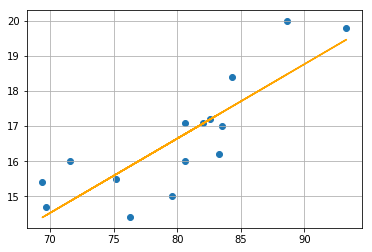

In [0]:
##### Your Code Here #####
Y_hat = [temp * Beta[1,0] + Beta[0,0] for temp in df.temperature]
plt.scatter(df.temperature, df.chirps_per_sec)
plt.plot(df.temperature, Y_hat, color='orange')
plt.grid(True)


## 4) If a cricket has chirped 19 times in a second what is the predicted temperature? Plot this prediction as well.

Predicted temperature: 91.11310072893363


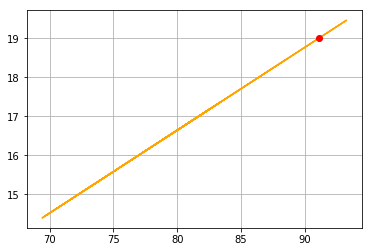

In [0]:
##### Your Code Here #####
temp_pred = (19-Beta[0,0])/Beta[1,0]
print("Predicted temperature:", temp_pred)
plt.plot(df.temperature, Y_hat, color='orange')
plt.plot([temp_pred], [19], marker='o', color="red")
plt.grid(True)

##Stretch Problem
Let's add a 3rd dimension. 

X1 = systolic blood pressure

X2 = age in years

X3 = weight in pounds

Compute the coefficients for the **plane** of best fit for

$X_1 = \beta_1X_2 + \beta_2X_3 + \beta_0$

Then graph the plane in addition to the  datapoints in a **3D** graph.
An article to get you started on [3D graphing](https://jakevdp.github.io/PythonDataScienceHandbook/04.12-three-dimensional-plotting.html)

In [0]:
s_data = pd.read_excel('https://college.cengage.com/mathematics/brase/understandable_statistics/7e/students/datasets/mlr/excel/mlr02.xls')
print(s_data.head())
s_data.shape

*** No CODEPAGE record, no encoding_override: will use 'ascii'
    X1  X2   X3
0  132  52  173
1  143  59  184
2  153  67  194
3  162  73  211
4  154  64  196


(11, 3)

In [0]:
s_data['ones'] = np.ones(s_data.shape[0])
X = np.matrix(s_data[['ones', 'X2', 'X3']])
print(X)

[[  1.  52. 173.]
 [  1.  59. 184.]
 [  1.  67. 194.]
 [  1.  73. 211.]
 [  1.  64. 196.]
 [  1.  74. 220.]
 [  1.  54. 188.]
 [  1.  61. 188.]
 [  1.  65. 207.]
 [  1.  46. 167.]
 [  1.  72. 217.]]


In [0]:
Y = np.matrix(s_data.X1).reshape(-1,1)
print(Y)

[[132]
 [143]
 [153]
 [162]
 [154]
 [168]
 [137]
 [149]
 [159]
 [128]
 [166]]


In [0]:
X_transpose = np.transpose(X)
X_transpose_X = np.matmul(X_transpose, X)
X_inv = np.linalg.inv(X_transpose_X)
X_transpose_Y = np.matmul(X_transpose, Y)
Beta = np.matmul(X_inv, X_transpose_Y)
print(Beta)


[[30.99410295]
 [ 0.86141469]
 [ 0.3348592 ]]


In [0]:
Y_hat = s_data.X2.as_matrix() * Beta[1,0] + s_data.X3.as_matrix() * Beta[2,0] + Beta[0,0]
print(Y_hat)

[133.71830776 143.43166173 153.6715712  164.53266567 151.75704553
 168.40781313 140.46402509 146.49392789 156.30191139 126.54066446
 165.68040616]


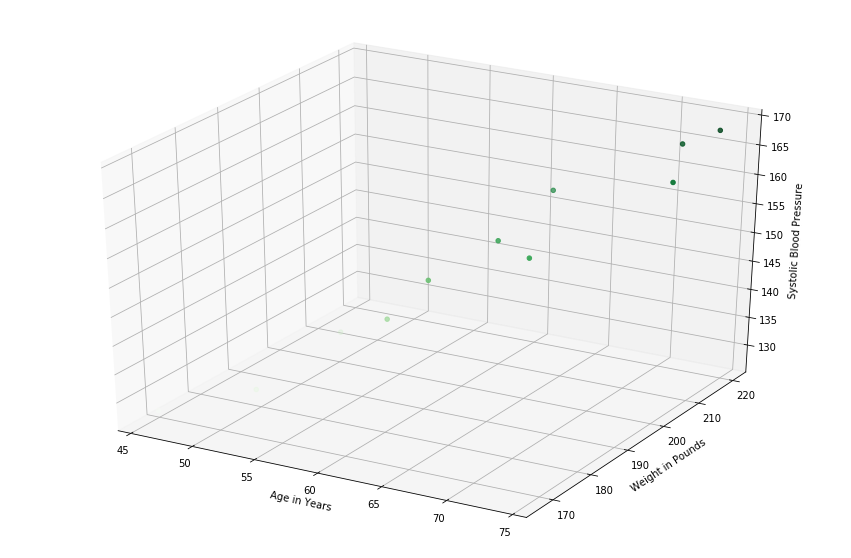

In [0]:
from mpl_toolkits import mplot3d
%matplotlib inline

fig = plt.figure(figsize=(15,10))
ax = plt.axes(projection='3d')

# Data for a three-dimensional line
# ax.plot3D(s_data.X2, s_data.X3, Y_hat, 'gray')

# Data for three-dimensional scattered points
ax.scatter3D(s_data.X2, s_data.X3, s_data.X1, c=s_data.X1, cmap='Greens');
ax.set_xlabel('Age in Years')
ax.set_ylabel('Weight in Pounds')
ax.set_zlabel('Systolic Blood Pressure');

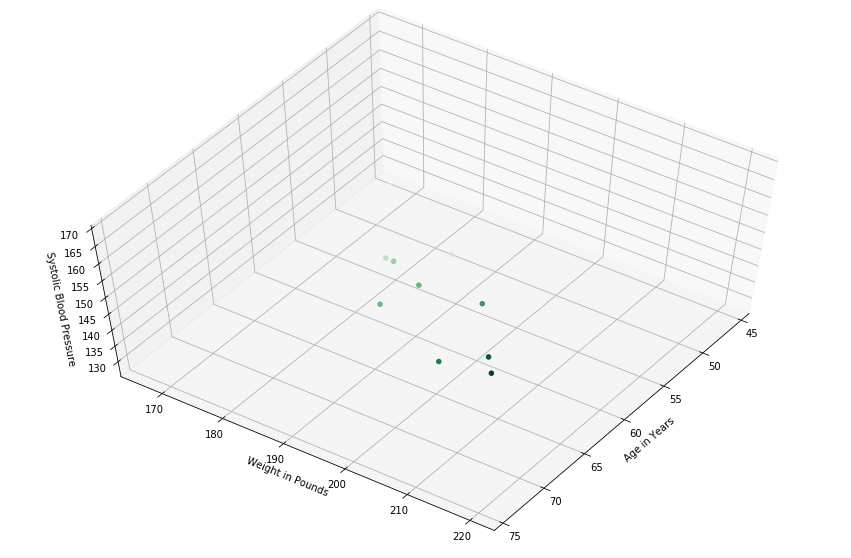

In [0]:
ax.view_init(60, 35)
fig